# Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy import stats

## 1.1 
Load the data into memory using pandas and print the first lines to get a sense of it.

In [12]:
data = pd.read_csv("./data/upworthy.csv.gz",  compression='gzip')
data.head(5)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


## 1.2 
Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (clickability_test_id column). Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. Last, plot the distribution of packages per experiment with a visualization of your choice.

4822 different experiments were conducted in this dataset and, on average, the number of packages considered per experiment was 4.2727084197428455.


<AxesSubplot:>

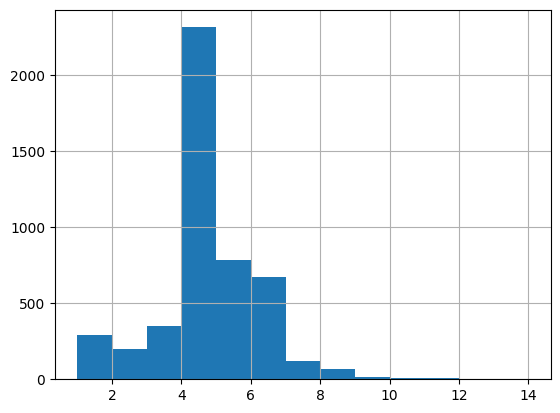

In [41]:
experiments_count=data["clickability_test_id"].value_counts()
print(f"{len(experiments_count)} different experiments were conducted in this dataset and, on average, the number of packages considered per \
experiment was {experiments_count.mean()}.")
experiments_count.hist(bins=13) #maybe we should delete the grid? I think the professor said something about it in the dataviz class

## 1.3 
A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

In [44]:
data["ctr"] = data["clicks"]/data["impressions"]
data[["clickability_test_id", "clicks", "impressions", "ctr"]].head() #test

,clickability_test_id,clicks,impressions,ctr
0,546d88fb84ad38b2ce000024,150,3052,0.049148
1,546d902c26714c6c44000039,90,3526,0.025525
2,546d902c26714c6c44000039,120,3506,0.034227
3,546d902c26714c6c44000039,98,3380,0.028994
4,546d902c26714c6c44000039,75,3465,0.021645


## 1.4
Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [70]:
headline_analysis=data.copy()
experience_ids=data['clickability_test_id'].unique()
for id in experience_ids:
    count_headlines=headline_analysis[headline_analysis['clickability_test_id']==id]['headline'].value_counts()
    if len(count_headlines)==1:
        headline_analysis=headline_analysis[headline_analysis['clickability_test_id']!=id]
        
count_before=data['clickability_test_id'].unique()
count_now=headline_analysis['clickability_test_id'].unique()
print(f'The lenght of the new dataframe is {len(headline_analysis)} (packages) because we discarted {len(count_before)-len(count_now)} experiences.')   

The lenght of the new dataframe is 11600 (packages) because we discarted 2236 experiences


## 1.5 
For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [72]:
image_analysis=data.copy()
experience_ids=data['clickability_test_id'].unique()
for id in experience_ids:
    count_images=image_analysis[image_analysis['clickability_test_id']==id]['eyecatcher_id'].value_counts()
    if len(count_images)==1:
        image_analysis=image_analysis[image_analysis['clickability_test_id']!=id]
        
count_before=data['clickability_test_id'].unique()
count_now=image_analysis['clickability_test_id'].unique()
print(f'The lenght of the new dataframe is {len(image_analysis)} (packages) because we discarted {len(count_before)-len(count_now)} experiences.')   

The lenght of the new dataframe is 7948 (packages) because we discarted 3103 experiences.


## 1.6 
**Discuss:** Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?


**Answer** : 

## 1.7 
For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first rows of your newly created dataframe, as well as its length.
-  the rows where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.


In [127]:
paired_headlines=headline_analysis.merge(headline_analysis, on=['eyecatcher_id', 'lede', 'excerpt','clickability_test_id'], suffixes=('1', '2'))
paired_headlines=paired_headlines[paired_headlines['ctr1']>paired_headlines['ctr2']][['created_at1','headline1','ctr1','headline2','ctr2']] \
    .rename(columns={'created_at1': 'date_created'})
paired_headlines.reset_index(drop=True,inplace=True)

print(f'The length of the new dataframe is {len(paired_headlines)}')
paired_headlines.head(5) #not sure if the id should stay as a column but I think not as it is not relevant for title analysis

The length of the new dataframe is 17727


,date_created,headline1,ctr1,headline2,ctr2
0,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,0.011101,He Sat Them Down And Told Them About An Immine...,0.005868
1,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,0.011101,"They May Not Be The Most Handsome Dudes, But T...",0.009726
2,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,What They Learned From The Scientist Was Terri...,0.011101
3,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,He Sat Them Down And Told Them About An Immine...,0.005868
4,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,"They May Not Be The Most Handsome Dudes, But T...",0.009726


## 1.8 
To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`). 

In [128]:
avg_diff_per_pair=(paired_headlines['ctr1']-paired_headlines['ctr2']).mean()
avg_least_clicked=paired_headlines['ctr2'].mean()
print(f'The average difference per pair between the most clicked-through and the least clicked-through headline is {avg_diff_per_pair}.\n\
The average clickthrough rate for the least clicked through headline is {avg_least_clicked}')

The average difference per pair between the most clicked-through and the least clicked-through headline is 0.004116426877032496.
The average clickthrough rate for the least clicked through headline is 0.010691857228802412


## 1.9
**Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

**Answer:**

# Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data. 
We start this task from the dataset obtained in **T1.7**. 
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline. 
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser." 
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)

## 2.1 
Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

In [129]:
# 2.1 (provided code)
def count_words_simple(x):
    return len(x.split(" "))

paired_headlines['numwords1']=list(map(count_words_simple, paired_headlines['headline1'].astype(str)))
paired_headlines['numwords2']=list(map(count_words_simple, paired_headlines['headline2'].astype(str)))
paired_headlines.head(5)

,date_created,headline1,ctr1,headline2,ctr2,numwords1,numwords2
0,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,0.011101,He Sat Them Down And Told Them About An Immine...,0.005868,15,19
1,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,0.011101,"They May Not Be The Most Handsome Dudes, But T...",0.009726,15,16
2,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,What They Learned From The Scientist Was Terri...,0.011101,14,15
3,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,He Sat Them Down And Told Them About An Immine...,0.005868,14,19
4,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,"They May Not Be The Most Handsome Dudes, But T...",0.009726,14,16


## 2.2 
Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

In [130]:
# 2.2 (provided code)
feature_wordsets = dict([
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])

In [171]:
for h in ['1','2']:
    for k, v in feature_wordsets.items():
        paired_headlines[k+h] = list(map(lambda t: 1 if len(set(list(set(t.lower().split(' '))) + v)) < len(list(set(t.split(' ')))+v) else 0, \
            paired_headlines['headline'+h]))
        
paired_headlines.head(5)

,date_created,headline1,ctr1,headline2,ctr2,numwords1,numwords2,first_person_singular1,first_person_plural1,second_person1,third_person_singular1,third_person_plural1,first_person_singular2,first_person_plural2,second_person2,third_person_singular2,third_person_plural2
0,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,0.011101,He Sat Them Down And Told Them About An Immine...,0.005868,15,19,0,0,0,0,1,0,0,0,1,1
1,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,0.011101,"They May Not Be The Most Handsome Dudes, But T...",0.009726,15,16,0,0,0,0,1,0,0,0,0,1
2,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,What They Learned From The Scientist Was Terri...,0.011101,14,15,0,0,0,0,0,0,0,0,0,1
3,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,He Sat Them Down And Told Them About An Immine...,0.005868,14,19,0,0,0,0,0,0,0,0,1,1
4,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,"They May Not Be The Most Handsome Dudes, But T...",0.009726,14,16,0,0,0,0,0,0,0,0,0,1


## 2.3 
One easy way to classify sentiment is simply to match negative or positive words. 
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    

In [184]:
with open('positive.txt') as f:
    positive = f.read().splitlines()
with open('negative.txt') as f:
    negative = f.read().splitlines()
    
for h in ['1','2']:
    paired_headlines['positive'+h] = list(map(lambda t: 1 if len(set(list(set(t.lower().split(' '))) + positive)) < len(list(set(t.split(' ')))+positive) else 0, \
        paired_headlines['headline'+h]))
    paired_headlines['negative'+h] = list(map(lambda t: 1 if len(set(list(set(t.lower().split(' '))) + negative)) < len(list(set(t.split(' ')))+negative) else 0, \
        paired_headlines['headline'+h]))

        
paired_headlines.head(5)

,date_created,headline1,ctr1,headline2,ctr2,numwords1,numwords2,first_person_singular1,first_person_plural1,second_person1,...,third_person_plural1,first_person_singular2,first_person_plural2,second_person2,third_person_singular2,third_person_plural2,positive1,negative1,positive2,negative2
0,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,0.011101,He Sat Them Down And Told Them About An Immine...,0.005868,15,19,0,0,0,...,1,0,0,0,1,1,0,0,0,1
1,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,0.011101,"They May Not Be The Most Handsome Dudes, But T...",0.009726,15,16,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,What They Learned From The Scientist Was Terri...,0.011101,14,15,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,He Sat Them Down And Told Them About An Immine...,0.005868,14,19,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,0.012689,"They May Not Be The Most Handsome Dudes, But T...",0.009726,14,16,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

## 3.1 
First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

In [213]:
mean_numwords1=paired_headlines['numwords1'].mean()
mean_numwords2=paired_headlines['numwords2'].mean()
mean_diff_nbr_words=mean_numwords1-mean_numwords2
independent_sample_test=stats.ttest_ind(paired_headlines['numwords1'], paired_headlines['numwords2'], equal_var=True)
paired_test=stats.ttest_rel(paired_headlines['numwords1'], paired_headlines['numwords2'])
print(f'The mean difference is {mean_diff_nbr_words}, the independent sample t-test result was {independent_sample_test} and the paired t-test result was {paired_test}.')

The mean difference is 0.277655553675185, the independent sample t-test result was Ttest_indResult(statistic=8.474890728758453, pvalue=2.442511064669354e-17) and the paired t-test result was Ttest_relResult(statistic=10.208663781647646, pvalue=2.118549790803941e-24).


## 3.2 
**Discuss:** Are longer headlines more successful? Justify.

## 3.3 
The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$

In [218]:
X=np.random.uniform(low=0, high=1, size=30)
Y=np.random.uniform(low=0, high=1, size=30)
Z=X/2+Y/2+0.1
K=Y+0.1

(30, 30, 30, 30)

## 3.4
**Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

## 3.5 
Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

In [238]:
independent_sample_XZ=[]
independent_sample_XK=[]
paired_XZ=[]
paired_XK=[]
for i in range(10000):
    X=np.random.uniform(low=0, high=1, size=30)
    Y=np.random.uniform(low=0, high=1, size=30)
    Z=X/2+Y/2+0.1
    K=Y+0.1
    independent_sample_XZ.append(stats.ttest_ind(X, Z, equal_var=True)[1])
    independent_sample_XK.append(stats.ttest_ind(X, Z, equal_var=True)[1])
    paired_XZ.append(stats.ttest_rel(X, K)[1])
    paired_XK.append(stats.ttest_rel(X, K)[1])
    
p_values=pd.DataFrame(list(zip(independent_sample_XZ, independent_sample_XK, paired_XZ, paired_XK)), columns =['independent_sample_XZ', 'independent_sample_XK', 'paired_XZ', 'paired_XK'])


## 3.6 
Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.

In [ ]:
# I tried but just didnt understand 

## 3.7 
**Discuss:** When are paired t-tests helpful? Justify.

## 3.8 
With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

In [344]:
number_words_ratio=[]
diff_positive=[]
diff_negative=[]
diff_first_person_singular=[]
diff_first_person_plural=[]
diff_second_person=[]
diff_third_person_singular=[]
diff_third_person_plural=[]

for i in range(1000):
    resample=paired_headlines.sample(n=len(paired_headlines), replace=True, ignore_index=True)
    
    number_words_ratio.append((resample['numwords1']/resample['numwords2']).mean())
    
    diff_positive.append(resample['positive1'].value_counts()[1]-resample['positive2'].value_counts()[1])
    diff_negative.append(resample['negative1'].value_counts()[1]-resample['negative2'].value_counts()[1])
    
    diff_first_person_singular.append(resample['first_person_singular1'].value_counts()[1]-resample['first_person_singular2'].value_counts()[1])
    diff_first_person_plural.append(resample['first_person_plural1'].value_counts()[1]-resample['first_person_plural2'].value_counts()[1])
    diff_second_person.append(resample['second_person1'].value_counts()[1]-resample['second_person2'].value_counts()[1])
    diff_third_person_singular.append(resample['third_person_singular1'].value_counts()[1]-resample['third_person_singular2'].value_counts()[1])
    diff_third_person_plural.append(resample['third_person_plural1'].value_counts()[1]-resample['third_person_plural2'].value_counts()[1])
    

In [340]:
CI_beginning=24
CI_end=974

number_words_ratio=sorted(number_words_ratio)
diff_positive=sorted(diff_positive)
diff_negative=sorted(diff_negative)
diff_first_person_singular=sorted(diff_first_person_singular)
diff_first_person_plural=sorted(diff_first_person_plural)
diff_second_person=sorted(diff_second_person)
diff_third_person_singular=sorted(diff_third_person_singular)
diff_third_person_plural=sorted(diff_third_person_plural)

number_words_ratio_CI=[number_words_ratio[CI_beginning], number_words_ratio[CI_end]]
diff_positive_CI=[diff_positive[CI_beginning], diff_positive[CI_end]]
diff_negative_CI=[diff_negative[CI_beginning], diff_negative[CI_end]]
diff_first_person_singular_CI=[diff_first_person_singular[CI_beginning], diff_first_person_singular[CI_end]]
diff_first_person_plural_CI=[diff_first_person_plural[CI_beginning], diff_first_person_plural[CI_end]]
diff_second_person_CI=[diff_second_person[CI_beginning], diff_second_person[CI_end]]
diff_third_person_singular_CI=[diff_third_person_singular[CI_beginning], diff_third_person_singular[CI_end]]
diff_third_person_plural_CI=[diff_third_person_plural[CI_beginning], diff_third_person_plural[CI_end]]

number_words_ratio_mean=sum(number_words_ratio)/len(number_words_ratio)
diff_positive_mean=sum(diff_positive)/len(diff_positive)
diff_negative_mean=sum(diff_negative)/len(diff_negative)
diff_first_person_singular_mean=sum(diff_first_person_singular)/len(diff_first_person_singular)
diff_first_person_plural_mean=sum(diff_first_person_plural)/len(diff_first_person_plural)
diff_second_person_mean=sum(diff_second_person)/len(diff_second_person)
diff_third_person_singular_mean=sum(diff_third_person_singular)/len(diff_third_person_singular)
diff_third_person_plural_mean=sum(diff_third_person_plural)/len(diff_third_person_plural)

In [343]:
print(f'Ratio between the number of words:\n mean {number_words_ratio_mean}, CI {number_words_ratio_CI}\n')
print(f'Difference in usage of positive words:\n mean {diff_positive_mean}, CI {diff_positive_CI}\n')
print(f'Difference in usage of negative words:\n mean {diff_negative_mean}, CI {diff_negative_CI}\n')
print(f'Difference in usage of first person singular pronouns:\n mean {diff_first_person_singular_mean}, CI {diff_first_person_singular_CI}\n')
print(f'Difference in usage of first person plural pronouns:\n mean {diff_first_person_plural_mean}, CI {diff_first_person_plural_CI}\n')
print(f'Difference in usage of second person pronouns:\n mean {diff_second_person_mean}, CI {diff_second_person_CI}\n')
print(f'Difference in usage of third person singular pronouns:\n mean {diff_third_person_singular_mean}, CI {diff_third_person_singular_CI}\n')
print(f'Difference in usage of third person plural pronouns:\n mean {diff_third_person_plural_mean}, CI {diff_third_person_plural_CI}\n')

Ratio between the number of words:
 mean 1.0620920782042866, CI [1.0573117968998678, 1.0666491698363931]

Difference in usage of positive words:
 mean -102.842, CI [-274, 64]

Difference in usage of negative words:
 mean 274.193, CI [124, 424]

Difference in usage of first person singular pronouns:
 mean 294.114, CI [192, 404]

Difference in usage of first person plural pronouns:
 mean -177.274, CI [-281, -69]

Difference in usage of second person pronouns:
 mean 115.556, CI [-21, 255]

Difference in usage of third person singular pronouns:
 mean 661.921, CI [527, 802]

Difference in usage of third person plural pronouns:
 mean 88.903, CI [-27, 208]



## 3.9 
**Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.